# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
import folium
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
fig_size = (15,5)

In [2]:
data_folder = 'data/'

## Task 1: Cartography and census

>__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

>__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

>__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

__A) Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON data/ch-cantons.topojson.json that contains the borders of the cantons.__

In order to display the map, we will first of all use the map method from the Folium library, and specify the coordinates to center the map to Switzerland with an adapted zoom.
We will then load the topojson borders data and load it. 
Then as we have to implement the choropleth method in order to plot a GeoJson overlay on the map. As we have a TopoJson format we will have to specify the parameter 'topojson' with the object reference to convert. 

In [73]:
# Load and print the map centered in Switzerland's position
m_sw = folium.Map(location=[46.8, 8.33],
                   tiles='Mapbox Bright', zoom_start=8)

# Load the TopoJson data containing the borders
state_geo_path = r''+data_folder+'ch-cantons.topojson.json'
geo_json_data = json.load(open(state_geo_path))

#Convert the TopoJson to GeoJson and apply it to plot a GeoJson border overlay on the base map
m_sw.choropleth(geo_data= geo_json_data, topojson='objects.cantons')

# Plot the map
m_sw

__B) Take the spreadsheet data/communes_pop.xls, collected from admin.ch, containing population figures for every commune. Plot a histogram of the population counts and explain your observations.__

In order to plot an histogram of the swiss population we will first load the most recent sheet (2017) dataset in the xls file. As in the excel file the index (name of communes) is stored in column A, and the population is stored in column B, we will only load these columns.

In [75]:
# Extract communes names & population associated from excel file, 
# with header offset to directly get the pairs values : communes names/population count
data_population = pd.read_excel(data_folder+'communes_pop.xls', header=5,usecols="A:B",sheet_name="2017" )

In [79]:
# Clean the index by removing the NaN values 
data_population2 = data_population.reset_index().dropna().set_index('index')
# Modify the name of Population column
data_population2.columns = ['Population']

# Overview of the loaded data
data_population2.head()

,Population
index,
Suisse 2),8419550.0
- Zürich,1487969.0
>> Bezirk Affoltern,52904.0
......0001 Aeugst am Albis,1977.0
......0002 Affoltern am Albis,11900.0


We can see that there is 3 types of data : 
- Starting with '-' are the cantons names
- Starting with '>>' are the main towns names
- Starting with '...' are all the communes

In [91]:
# Print an overview of the extracted cantons
print(" ------ Cantons : ------ " + str(data_population2[data_population2.index.str.startswith('-')].shape[0]) ) 
print (data_population2[data_population2.index.str.startswith('-')].head())

 ------ Cantons : ------ 26
                Population
index                     
- Zürich         1487969.0
- Bern / Berne   1026513.0
- Luzern          403397.0
- Uri              36145.0
- Schwyz          155863.0


In [92]:
# Print an overview of the extracted towns
print( " ------ Towns : ------ " + str(data_population2[data_population2.index.str.startswith('>>')].shape[0]) )
print (data_population2[data_population2.index.str.startswith('>>')].head())

 ------ Towns : ------ 140
                       Population
index                            
>> Bezirk Affoltern       52904.0
>> Bezirk Andelfingen     30981.0
>> Bezirk Bülach         147379.0
>> Bezirk Dielsdorf       88921.0
>> Bezirk Hinwil          94322.0


In [94]:
# Print an overview of the extracted communes
print(" ------ Communes : ------ " + str(data_population2[data_population2.index.str.startswith('...')].shape[0]) )
print (data_population2[data_population2.index.str.startswith('...')].head())

 ------ Communes : ------ 2240
                               Population
index                                    
......0001 Aeugst am Albis         1977.0
......0002 Affoltern am Albis     11900.0
......0003 Bonstetten              5435.0
......0004 Hausen am Albis         3571.0
......0005 Hedingen                3687.0


We are now only interested in the communes we will then extract these data and plot the histogram.

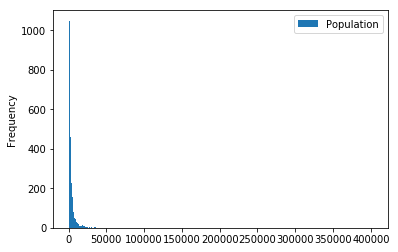

In [231]:
# Extract communes (data starting with '...')
data_communes = data_population2[data_population2.index.str.startswith('...')]

# Plot histogram with 300 bins
data_communes.plot.hist(bins = 300)

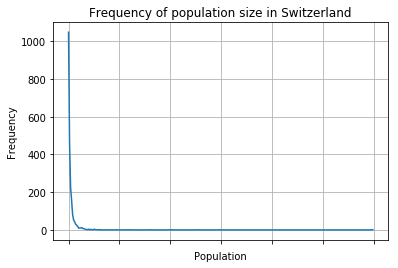

In [232]:
nb_occurences = pd.cut(data_communes['Population'], bins=300, precision=0)
# Store the value of each values and its related bin interval

# Count the number of occurences for each bin
ax = nb_occurences.value_counts(sort=False).plot()
ax.grid(True)
ax.set_title("Frequency of population size in Switzerland")
ax.set_xlabel("Population")
ax.set_ylabel("Frequency")

plt.show()

__What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?__

We can see on this histogram that there is much more rural communes in Switzerland than urban communes. Indeed there is a huge amount of communes with less than 1000 citizens, and a very few number of communes with more than 100.000 citizens. We will then check the outliers.

In [155]:
data_communes.describe()

,Population
count,2240.000000
mean,3758.727679
std,12306.015472
min,14.000000
25%,670.500000
50%,1477.500000
75%,3604.500000
max,402762.000000


We can already see in the description some outliers. Indeed the mean is about 3700, and the maximum is more than 400.000 (Zurich) and the min is only 14, so there is extreme values. The quartile 75% is smaller than the mean, meaning that most of the dataset has a small population.

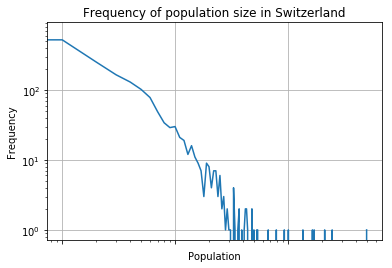

In [233]:
nb_occurences = pd.cut(data_communes['Population'], bins=500)
# Store the value of each bin and intervals

ax = nb_occurences.value_counts(sort=False).plot(loglog=True)
ax.grid(True)
ax.set_title("Frequency of population size in Switzerland")
ax.set_xlabel("Population")
ax.set_ylabel("Frequency")

plt.show()

In [12]:
print("Number of communes with less than 100 citizens : " + str(data_communes[data_communes["Population"] <= 100].shape[0]))

Number of communes with less than 100 citizens : 37


In [228]:
print("Number of communes with more than 100 000 citizens (outliers): " + str(data_communes[data_communes["Population"] >= 100000].shape[0]))

print("\n\nExample of communes which are outliers : ")
print(str(data_communes[data_communes["Population"] >= 100000]))

Number of communes with more than 100 000 citizens (outliers): 6


Example of communes which are outliers : 
                       Population
index                            
......0230 Winterthur    109775.0
......0261 Zürich        402762.0
......0351 Bern          133115.0
......2701 Basel         171017.0
......5586 Lausanne      137810.0
......6621 Genève        198979.0


In the frequency plot we can see that there is mostly 1 occurence per bin after a threshold value.
We can observe that only 6 communes have a number of citizens greater than 100.000 and especially Zurich which has 400.000 citizens. These numbers are then totally different compared to the rest of the dataset, and we can observe that there is some communes with less than 100 citizens. The dataset is then divisersified, and Switzerland has much more rural communes.

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent power-laws is to use a histogram using a log-log scale. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.

__Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results.__

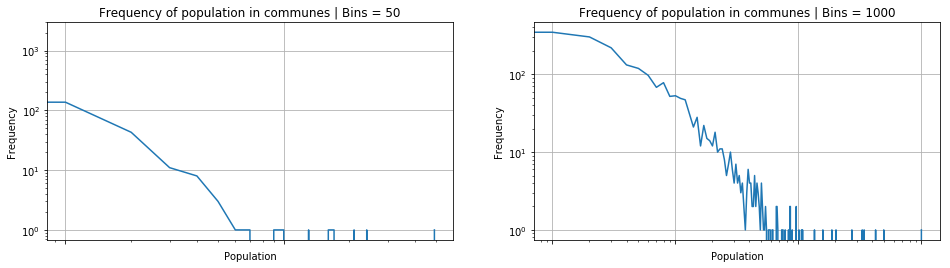

In [201]:
# Prepare the figure to create 2 subplots
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16,4)

# First histogram plot, with 50 bins 
# Extract data and store it using bins intervals. Here 50
cut_population = pd.cut(data_communes['Population'], bins=50)
# We apply the loglog parameter in order to have the x and y label set to log scale
ax = cut_population.value_counts(sort=False).plot(loglog=True, ax=axes[0])
ax.grid(True)
ax.set_title("Frequency of population in communes | Bins = 50")
ax.set_xlabel("Population")
ax.set_ylabel("Frequency")

# First histogram plot, with 1000 bins
# Extract data and store it using bins intervals. Here 1000
cut_population = pd.cut(data_communes['Population'], bins=1000)
ax2 = cut_population.value_counts(sort=False).plot(loglog=True, ax=axes[1])
ax2.grid(True)
ax2.set_title("Frequency of population in communes | Bins = 1000")
ax2.set_xlabel("Population")
ax2.set_ylabel("Frequency")


plt.show()

In the plot below we can clearly see that with small bins there is some artefacts on the dataset compared to big bins which is more linear. Indeed with big bins there will be more value sampled in the same interval. But the outliers are still shown as they are really different to the previous samples. 

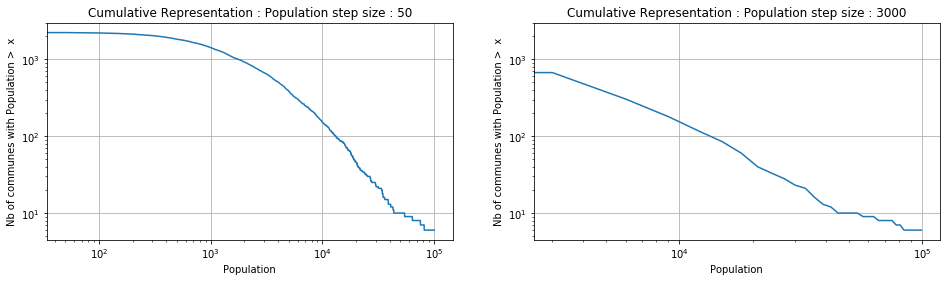

In [223]:
# Prepare the figure to create 2 subplots
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16,4)

# -- Subplot 1 -------

# We define the x axis to be values with a step of 50 between each point.
# We divided the maximum by 4 in order to have a better visualization (as there is only 1/2 communes in the last values)
x = np.arange(data_communes['Population'].max()/4, step = 50 )
# Initialize the y vector
y = []
# Stores in y the number of communes grater than the threshold defined by x
for threshold in x:
    y.append(data_communes[data_communes['Population'] >= threshold].shape[0])

# Transform the y list into a Series using the Population index    
y = pd.Series(y,index=pd.Index(x, name='Population'))
# Plot using a loglog scale
ax = y.plot(loglog=True, ax=axes[0])
ax.grid(True)
ax.set_xlabel("Population")
ax.set_ylabel("Nb of communes with Population >  x")
ax.set_title("Cumulative Representation : Population step size : 50")    


# -- Subplot 2 -------

# We define the x axis to be values with a step of 3000 between each point.
# We divided the maximum by 4 in order to have a better visualization (as there is only 1/2 communes in the last values)
x2 = np.arange(data_communes['Population'].max()/4, step = 3000 )
# Initialize the y vector
y2 = []
# Stores in y the number of communes grater than the threshold defined by x
for threshold in x2:
    y2.append(data_communes[data_communes['Population'] >= threshold].shape[0])


# Transform the y list into a Series using the Population index    
y2 = pd.Series(y2,index=pd.Index(x2, name='Population'))
# Plot using a loglog scale
ax2 = y2.plot(loglog=True, ax=axes[1])
ax2.grid(True)
ax2.set_xlabel("Population")
ax2.set_ylabel("Nb of communes with Population >  x")
ax2.set_title("Cumulative Representation : Population step size : 3000")


plt.show() 

In these plots we can observe that the cumulative representation is way more robust to artefacts and gives a more linear representation (depending on the step size value of x)


__What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?__

We can see that there is some linear relationship between the frequency and the value of each bin. The linear form degree depends on the representation method and of the step/bin size.

<br>

---

# Task 2: Parties visualized

>We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


>__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

>__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

>__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

<br>

#### __Let's start by importing and cleaning our data__
<br>

In tis step, we will proceed to the following process to clean and remove outliers, missing values, etc:
- Removing empty columns
- Removing empty rows
- Removing everything that is not part of the data (explanations etc.)
- Removing two cantons for which data is missing

In [18]:
voters = pd.read_excel("data/voters.xls", header=2, index_col=0)

In [19]:
voters.head()

,Unnamed: 1,Année électorale 2),Participation,PLR 6),Unnamed: 5,PDC 7),Unnamed: 7,PS,Unnamed: 9,UDC,...,JB,Unnamed: 55,Front,Unnamed: 57,Grut,Unnamed: 59,Autres 11),Unnamed: 61,K,Total
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zurich,NaN,2015.0,32.652497,17.327820,NaN,4.878712,NaN,19.716444,NaN,30.023215,...,NaN,NaN,NaN,NaN,NaN,NaN,0.669707,NaN,NaN,100
Berne,NaN,2018.0,30.516313,11.717910,NaN,0.671415,NaN,22.328775,NaN,26.760869,...,NaN,NaN,NaN,NaN,NaN,NaN,0.912781,NaN,NaN,100
Lucerne,NaN,2015.0,38.741267,21.039516,NaN,30.862513,NaN,11.848915,NaN,24.115646,...,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,NaN,NaN,100


Our data looks really bad 🧐 Indeed, the excel file is very messy, so let's correct everything.

<br>

In [20]:
# Removing empty columns (their name is "Undefined")
voters = voters.loc[:, ~voters.columns.str.contains('^Unnamed')]

# Removing empty rows (their index value is set to NaN)
voters = voters.loc[voters.index.to_series().dropna()]

# Removing explanations below our data (we remove everyting after the last row "Jura")
idx = int(np.where(voters.index=='Jura')[0]) # Last valid index of our data
voters = voters.iloc[0:idx+1,:]

# Removing two cantons for which data is missing
#voters = voters.drop(['Appenzell Rh. Int. 4) 5)','Grisons 5)'],axis=0)

<br>

We have a lot of **missing data** ! 

$\rightarrow$ To use this dataset, we need to __replace every empty cell with a value of 0__ as they represent an abscence of vote.

In [21]:
voters = voters.fillna(0)
voters.head()

,Année électorale 2),Participation,PLR 6),PDC 7),PS,UDC,Dém.,PLS 6),AdI,PEV,...,PSL,Lega,MCR,LS,JB,Front,Grut,Autres 11),K,Total
Zurich,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,0.0,0.0,0.0,4.271767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669707,0.0,100
Berne,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,0.0,0.0,0.0,6.172897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.912781,0.0,100
Lucerne,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,0.0,0.0,0.0,0.199143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036129,0.0,100
Uri 1),2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.428270,0.0,100
Schwytz,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,0.0,0.0,0.0,0.304428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.513578,0.0,100


<br>

Finally, we notice that **the names of the canton are not correct** as many of them have numbers in  them.

$\rightarrow$ We will **replace them by their IDs**, which we can find in the json file.

In [22]:
# We get from the json file all the canton's ids.
canton_id = []
for canton in geo_json_data["objects"]["cantons"]["geometries"] :
    canton_id.append(canton['id']);

print("List of canton ids :" ,canton_id) 

List of canton ids : ['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']


<br>

Let's simply use this list to replace the previous index:

In [23]:
voters.index=canton_id
voters.index.name="canton_id"
voters.head(10)

,Année électorale 2),Participation,PLR 6),PDC 7),PS,UDC,Dém.,PLS 6),AdI,PEV,...,PSL,Lega,MCR,LS,JB,Front,Grut,Autres 11),K,Total
canton_id,,,,,,,,,,,,,,,,,,,,,
ZH,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,0.0,0.0,0.0,4.271767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669707,0.0,100
BE,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,0.0,0.0,0.0,6.172897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.912781,0.0,100
LU,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,0.0,0.0,0.0,0.199143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036129,0.0,100
UR,2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.428270,0.0,100
SZ,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,0.0,0.0,0.0,0.304428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.513578,0.0,100
OW,2018.0,53.793314,17.174703,29.803630,15.090867,24.532303,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.398497,0.0,100
NW,2018.0,54.921606,28.012430,26.750081,4.470053,25.916631,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.446747,0.0,100
GL,2018.0,29.489675,18.392812,9.400847,12.750408,25.275361,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.803643,0.0,100
ZG,2014.0,42.939437,22.147887,26.783136,9.250912,23.631802,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.579922,0.0,100


<br>

**Our data is now cleaned**, we can start the visualization 🥳

<br>

#### **A: Let's visualize the percentage of voters in each canton who voted for the party UDC:**
<br>

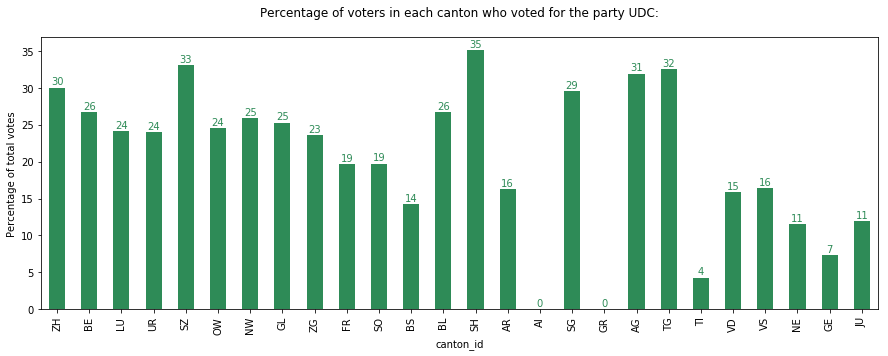

In [24]:
ax = pd.Series(voters['UDC']).plot.bar(figsize=fig_size, label='voters',color="seagreen")
ax.set_title('Percentage of voters in each canton who voted for the party UDC:\n')
ax.set_ylabel('Percentage of total votes')
for i,child in enumerate(ax.get_children()[:voters.index.size]):
 ax.text(i,child.get_bbox().y1+0.4,int(voters['UDC'][i]), horizontalalignment ='center', color="seagreen")
plt.show()

<br>

Let's put this in a **map** using folium:

In [25]:
# Load the map in order to not overide it several time when calling choropleth
m_sw_udc = folium.Map(location=[46.8, 8.33],
                   tiles='Mapbox Bright', zoom_start=7);

m_sw_udc.choropleth(geo_data=geo_json_data, topojson='objects.cantons', data=voters,
             columns=[voters.index,'UDC'],
             key_on='feature.id',
             fill_color='YlGn',
             fill_opacity=1, line_opacity=0.8,
             legend_name='Percentage of voters who voted for the party UDC')
m_sw_udc

<br>

From this map, we can say that **UDC is more popular in the German-speaking part** of Switzerland.

<br>

#### **B: For the same period, let's  visualize the number of residents in each canton who voted for UDC:**
<br>

To do that, we have to convert the percentage of voters to a number of residents, which is available in the file `national_council_elections.xlsx`.

In [26]:
nce = pd.read_excel("data/national_council_elections.xlsx", header=3, index_col=0)
# Removing empty rows (their index value is set to NaN)
nce = nce.loc[nce.index.to_series().dropna()]
nce = nce.drop(nce.index[[0]])
# Removing explanations below our data (we remove everyting after the last row "Jura")
idx = int(np.where(nce.index=='Jura')[0]) # Last valid index of our data
nce = nce.iloc[0:idx+1,:]
nce.index=canton_id
nce.index.name="canton_id"
nce.head()

,Electeurs inscrits,Electeurs 2),Participation en %
canton_id,,,
ZH,907623.0,428837.0,47.248362
BE,729203.0,357770.0,49.063155
LU,271143.0,138096.0,50.931059
UR,26414.0,15091.0,57.132581
SZ,102145.0,54857.0,53.705027


number of voters $=$ (registered residents) $\times$ (% of UDC voters) $\times$ (% of participation)

In [27]:
voters["n_UDC"]=(nce["Electeurs inscrits"]*(voters["UDC"]/100))*(voters["Participation"]/100)

In [28]:
voters["n_UDC"].head()

canton_id
ZH    88977.272344
BE    59549.856891
LU    25332.095474
UR     3938.418719
SZ    12768.106607
Name: n_UDC, dtype: float64

We now have the actual number of citizens who voted for UDC in each canton. Let's show this in a map:

In [29]:
# Load the map in order to not overide it several time when calling choropleth
m_sw_udc = folium.Map(location=[46.8, 8.33],
                   tiles='Mapbox Bright', zoom_start=7);

m_sw_udc.choropleth(geo_data=geo_json_data, topojson='objects.cantons', data=voters,
             columns=[voters.index,'n_UDC'],
             key_on='feature.id',
             fill_color='YlGn',
             fill_opacity=1, line_opacity=0.8,
             legend_name='Number of people who voted for the party UDC')
m_sw_udc

<br>

#### **C1: Which one of the two visualizations above would be more informative in case of a national election with majority voting?**
<br>

>**majority voting** = when a party needs to have the largest number of citizens voting for it among all parties

In case of a national election with majority voting, only the actual number of residents who voted for a party is important, thus only **the second map would be relevant**.
<br>

#### **C2: Which one is more informative for the cantonal parliament elections?**
<br>

For the cantonal parliament elections, the difference in the number of residents between two cantons is not relevant. Indeed, it's normal that fewer people would vote for a party in a small canton than in a large one with a lot of people, but the party wins as long as it gets a majority. In that case, **the first map would be relevant**.

---

<br>

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

# Explanation Task 3 A : 

- First we explore the data json file to take all canton's ids that we store in a list
- Then we compute the right lean for each canton using voters excel sheet (year 2014 - 2018)
- Then we create a dataframe containing right lean values and abrevations (ids) of all canton and visualize them on the swiss map.

To display all the right lean information on the swiss map, wee need information for all cantons (% votes, abrevation, ..). But we saw that data of two cantons in voters table are missing (Appenzell Rh. Int. and Grisons). 

But to use choropleth method with 'key_on', the data provided needs to contain as many cantons as it exists in the json file. In the json file there are 26 cantons, and in our voters dataframe there are 24 cantons + 2 without values. 

So we filled all NAN values of Appenzell Int. and Grisons by 0 to use them correclty. So please do not take care of this cantons while analysis the swiss map.

Gathering cantons's ids from canton json file :

In [30]:
# We get from the json file all the canton's ids.
canton_id = []
for canton in geo_json_data["objects"]["cantons"]["geometries"] :
    canton_id.append(canton['id']);

print("List of canton's ids : " ,canton_id) 

List of canton's ids :  ['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']


Next step, compute the right lean for all cantons. Then create a data frame containing right lean values plus cantons abbreviations

In [31]:
# Get the UDC and PS votes
UDC = voters['UDC'];
PS = voters['PS'];
# Compute right lean and transfrom it into datafram
right_lean = (UDC - PS)/(UDC + PS);
right_lean = pd.DataFrame(data=right_lean);

# We add a column containing cantons'id 
right_lean['Abr'] = pd.Series(canton_id, index=right_lean.index);
right_lean.rename(columns={0: 'RL'}, inplace=True);

# We fill NAN values by 0 and change the order of columns
right_lean = right_lean.fillna(0)
right_lean = right_lean[['Abr','RL']];
# Add index
right_lean.index = range(1,len(right_lean.index)+1);
right_lean.head()

,Abr,RL
1,ZH,0.207214
2,BE,0.090286
3,LU,0.341078
4,UR,0.298833
5,SZ,0.438521


Finally load the map and display it with custom coloring function that will style each canton in a particular way, dependant on the data :

In [32]:
# Load the map in order to not overide it several time when calling choropleth
m_sw_rl = folium.Map(location=[46.8, 8.33],
                   tiles='Mapbox Bright', zoom_start=7);

m_sw_rl.choropleth(geo_data=geo_json_data, topojson='objects.cantons', data=right_lean,
             columns=['Abr','RL'],
             key_on='feature.id',
             fill_color='RdBu',
             fill_opacity=1, line_opacity=0.8,
             legend_name='Right lean of general election')
m_sw_rl

## Can we observe the röstigraben ?

First of all wee can see 2 cantons on the right filled by "beige" colour which correspond to Appenzell Int and Grison. 

We can half-see and half-guess the röstigraben map. Because when we look at the röstigraben, we can see the cultural boundaries are crossing cantons of Vaud and Berne. Here we are visualizing right lean per canton. But we can see that Bern and Vaud have relatively (positive and negative) low values which highlight the fact that it is quite equal.

To see more detail we might compute right lean value not per canton but per commune of Berne and Vaud. On this way we might visualize a kind a speration between regions. Also, having correct values for Grison would have been great to really see on which "side" is the canton or if it is equal as Berne or Vaud.

    
Otherwise, red/orange canton are for a negative right lean, which correspond to a higher proportion of PS voters comparing to UDC (following the röstigraben map, that for french, italian and roman speaking regions).
Whereas blue cantons have a positive right lean value for an higher proportion of UDC voters (more german-speaking region) compare to PS. 

# Explanation Task 3 B : For each party, devise a way to visualize the difference between its 2014-2018 vote share and its 2010-2013 vote share for each canton. 

Here our solution idea : Put a Marker on each cantons which contains difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. 

Now let explain how wee proceed :

 - First step is to load the voters excel sheet for years 2010 to 2013 which correspond to sheet number 5 in voters.xlsx. Then some cleaning steps are required such as selecting only cantons's row (remove all explanation written in the file), then fill all NAn values by 0 and also removed unnamed columns.
 
 - Then calculate the difference between to dataframe to get evolution of the party over time
 
 - Finally display those information on markers on every cantons
 

In [33]:
voters_sheet_5 = pd.read_excel("data/voters.xls", header=2, index_col=0,sheet_name=5)
voters10_13 = voters_sheet_5.copy()

# Removing empty columns (their name is "Undefined")
voters10_13 = voters10_13.loc[:, ~voters10_13.columns.str.contains('^Unnamed')]

# Removing empty rows (their index value is set to NaN)
voters10_13 = voters10_13.loc[voters10_13.index.to_series().dropna()]

# Removing explanations below our data (we remove everyting after the last row "Jura")
#idx = int(np.where(voters.index=='Jura')[0]) # Last valid index of our data
voters10_13 = voters10_13.iloc[0:idx+1,:]

voters10_13 = voters10_13.fillna(0)

voters10_13.head()

,Année électorale,Participation,PLR 7),PDC,PS,UDC,Dém.,PLS 7),AdI,PEV,...,UDF,PSL,Lega,MCR,LS,JB,Front,Grut,Autres 10),Total
Zurich,2011.0,38.2347,12.934426,4.862598,19.317182,29.635552,0.0,0.0,0.0,3.778014,...,2.571601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.567131,100
Berne 4),2010.0,32.3464,10.335474,1.256537,18.852832,26.621577,0.0,0.0,0.0,5.898273,...,4.403570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977237,100
Lucerne,2011.0,43.469,18.864849,31.298184,10.964228,22.126508,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511289,100
Uri 1),2012.0,49.1591,20.281885,36.611083,12.085318,24.629866,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.499166,100
Schwytz,2012.0,45.114,22.818461,29.083853,12.381160,34.004523,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.492877,100


As wee can see the dataframe is still not very clean. As we want to do some dataframes operations (voters14_18 - voters10_13), they have to be the same columns and rows names.

So we continue the cleaning phase
The next steps are to clean the dataframe : 
- Remove cantons's names 
- Set index to number of cantons
- Then clear the columns names
- Drop useless columns. Indeed we want to do some mathematic operation between dataframes. So columns such as total or year have to be removed.


In [34]:
voters14_18 = voters.copy();

voters14_18 = voters14_18.loc[:, (voters14_18 != 0).any(axis=0)]
voters10_13 = voters10_13.loc[:, (voters10_13 != 0).any(axis=0)]

In [35]:
# Change dataframes ids
voters14_18 = voters14_18.set_index(voters.index)
voters14_18.index = range(1,len(voters14_18)+1)

voters10_13 = voters10_13.set_index(voters.index)
voters10_13.index = range(1,len(voters10_13)+1)

#Cleaning columns's names by removing space and symbols
voters14_18.columns = voters14_18.columns.str.replace(r"[( ).1234567890]", "")
voters10_13.columns = voters10_13.columns.str.replace(r"[( ).1234567890]", "")

In [36]:
# Removing non value columns
voters14_18.drop(columns=['Total'], axis=1, inplace=True);
voters14_18.drop(columns=['Annéeélectorale'],axis=1, inplace=True);
voters14_18.drop(columns=['Participation'],axis=1, inplace=True);

voters10_13.drop(columns=['Total'], axis=1, inplace=True);
voters10_13.drop(columns=['Annéeélectorale'], axis=1, inplace=True);
voters10_13.drop(columns=['Participation'], axis=1, inplace=True);

Now our both dataframe of period 2010-2013 and 2014-2018 are correclty set to compute the difference of votes. We will keep only 2 decimals of votes in order to have a cleaner and better view of values while clicking on markers

In [37]:
voters10_13.head()

,PLR,PDC,PS,UDC,PLS,PEV,PCS,PVL,PBD,PST,PSA,PES,AVF,Sol,DS,UDF,Lega,MCR,Autres
1,12.934426,4.862598,19.317182,29.635552,0.0,3.778014,0.0,10.265505,3.465970,0.0,0.000000,10.569400,1.627417,0.0,0.405206,2.571601,0.0,0.0,0.567131
2,10.335474,1.256537,18.852832,26.621577,0.0,5.898273,0.0,4.071319,16.027757,0.0,1.039215,10.101410,0.000000,0.0,0.414800,4.403570,0.0,0.0,0.977237
3,18.864849,31.298184,10.964228,22.126508,0.0,0.000000,0.0,5.904835,1.661765,0.0,0.000000,8.668342,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.511289
4,20.281885,36.611083,12.085318,24.629866,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.892682,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.499166
5,22.818461,29.083853,12.381160,34.004523,0.0,0.000000,0.0,0.000000,0.030112,0.0,0.000000,0.189013,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.492877


In [38]:
voters14_18.head()

,PLR,PDC,PS,UDC,PLS,PEV,PCS,PVL,PBD,PST,PSA,PES,AVF,Sol,DS,UDF,Lega,MCR,Autres,n_UDC
1,17.327820,4.878712,19.716444,30.023215,0.0,4.271767,0.0,7.637858,2.615760,0.000000,0.000000,7.218776,2.977664,0.0,0.000000,2.662277,0.0,0.0,0.669707,88977.272344
2,11.717910,0.671415,22.328775,26.760869,0.0,6.172897,0.0,6.914731,9.020796,0.327589,0.681873,10.104467,0.495841,0.0,0.179432,3.710624,0.0,0.0,0.912781,59549.856891
3,21.039516,30.862513,11.848915,24.115646,0.0,0.199143,0.0,4.320211,0.877915,0.000000,0.000000,6.700011,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.036129,25332.095474
4,26.856698,31.298814,12.984966,24.053191,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.378061,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.428270,3938.418719
5,21.628996,27.167707,12.925363,33.115090,0.0,0.304428,0.0,2.544623,0.000000,0.000000,0.000000,0.800215,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.513578,12768.106607


In [39]:
votes_evolution = voters14_18 - voters10_13;
votes_evolution = votes_evolution.round(decimals=2)

votes_evolution.head()

,AVF,Autres,DS,Lega,MCR,PBD,PCS,PDC,PES,PEV,PLR,PLS,PS,PSA,PST,PVL,Sol,UDC,UDF,n_UDC
1,1.35,0.10,-0.41,0.0,0.0,-0.85,0.0,0.02,-3.35,0.49,4.39,0.0,0.40,0.00,0.00,-2.63,0.0,0.39,0.09,NaN
2,0.50,-0.06,-0.24,0.0,0.0,-7.01,0.0,-0.59,0.00,0.27,1.38,0.0,3.48,-0.36,0.33,2.84,0.0,0.14,-0.69,NaN
3,0.00,-0.48,0.00,0.0,0.0,-0.78,0.0,-0.44,-1.97,0.20,2.17,0.0,0.88,0.00,0.00,-1.58,0.0,1.99,0.00,NaN
4,0.00,-0.07,0.00,0.0,0.0,0.00,0.0,-5.31,-1.51,0.00,6.57,0.0,0.90,0.00,0.00,0.00,0.0,-0.58,0.00,NaN
5,0.00,0.02,0.00,0.0,0.0,-0.03,0.0,-1.92,0.61,0.30,-1.19,0.0,0.54,0.00,0.00,2.54,0.0,-0.89,0.00,NaN


To display markers on the map, weed need some coordinates. For that we chose to put makers on every canton's capital City. We used google map to find all coordinates of those cities and put them in a list in sequence of the dataframe

In [40]:
coordLat = [47.371365 , 46.948758 , 47.049908 , 46.883170 ,
                   47.026638 , 46.896316 , 46.957673, 46.994107,
                   47.166155 , 46.806514 , 47.208860, 47.559158,
                   47.486167 , 47.696189 , 47.385732, 47.334526,
                   47.424624 , 46.850210 , 47.391759, 47.555698,
                   46.194162 , 46.518330 , 46.231991, 46.998827,
                   46.203874 , 47.365748] ;

coordLong = [8.540140, 7.443665,  8.307929, 8.639163,
                    8.631408,  8.245898,  8.365742,  9.073855,
                    8.515589,  7.161785,  7.532513,  7.588190,
                    7.733642,  8.637356,  9.277821,  9.408832,
                    9.374547,  9.531308,  8.045609,  8.898178,
                    9.023050,  6.631721,  7.360117,  6.930441,
                    6.143123,  7.345346];


coordLat = pd.Series(coordLat);
coordLat.index = range(1,27);

coordLong = pd.Series(coordLong);
coordLong.index = range(1,27);

After transforming longitudes and latitudes lists in Series, we put them in a dataframe

In [41]:
df = pd.DataFrame()
df['coordLat'] = coordLat;
df['coordLong'] = coordLong;

df.head()

,coordLat,coordLong
1,47.371365,8.540140
2,46.948758,7.443665
3,47.049908,8.307929
4,46.883170,8.639163
5,47.026638,8.631408


In [42]:
# This function will display for canton i all party's name with their respective value
def partiesDetail (df, i):
    my_string = 'Evolution of votes from period 2010-2013 to period 2014-2018 : \n'
    
    for j in range(0,df.shape[1]):
        my_string += '\n {} : {}%   \n'.format(df.columns.values[j], df[df.columns.values[j]].iloc[i] )

    return my_string;

In [43]:
map_1 = m_sw
#folium.TileLayer('stamentoner').add_to(map_1)
for i in range(0,len(votes_evolution)):
    folium.Marker([df.iloc[i]['coordLat'], 
                   df.iloc[i]['coordLong']], 
                   popup=partiesDetail(votes_evolution,i),
                   icon=folium.Icon(color='lightred', icon='info-sign')
                 ).add_to(map_1)

map_1

Our goal was to visualize all parties per cantons. So one marker for each party for each canton would have been really heavy on the map and not really efficient. Now to improve our visualization, it could be better to organize a bit the information displayed in markers, but it seems the '\n' doesn't work.

We are only comparing for share for two period so a substraction was enought to compare. Now if we want to compare from several year ranges, a scatter plot or plot can be a better way to visualize the data.